# Projet Spotify - R


## Importation des données

In [2]:
# Lecture des données
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
spotify <- read.table(paste(path, "spotify-extr.txt", sep = ""),
                    sep = " ", header = TRUE)
# Vérification du contenu
summary(spotify)

    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
    duration           energy       instrumentalness       key           
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   Length:10000      
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   Class :character  
 Median : 206530   Median :0.4760   Median :0.000174   Mode  :character  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947                     
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100                     
 Max.   :2703227   Max.   :1.0000   Max.   :1.000000                     
    liveness 

In [3]:
head(spotify)
spotify[, "key"] <- as.factor(spotify[, "key"])
spotify[, "pop.class"] <- as.factor(spotify[, "pop.class"])
spotify[, "mode"] <- as.factor(spotify[, "mode"])

summary (spotify)




,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
161704,0.647,1975,0.4490,0.376,298840,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,97.831,C
38184,0.489,2018,0.3710,0.856,324189,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,122.080,A


    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
                                                                  
    duration           energy       instrumentalness        key      
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   C      :1282  
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   G      :1188  
 Median : 206530   Median :0.4760   Median :0.000174   D      :1092  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947   A      :1050  
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100   F      : 961  
 Max.   :2703227   Max.   :1.0000   Max.   :

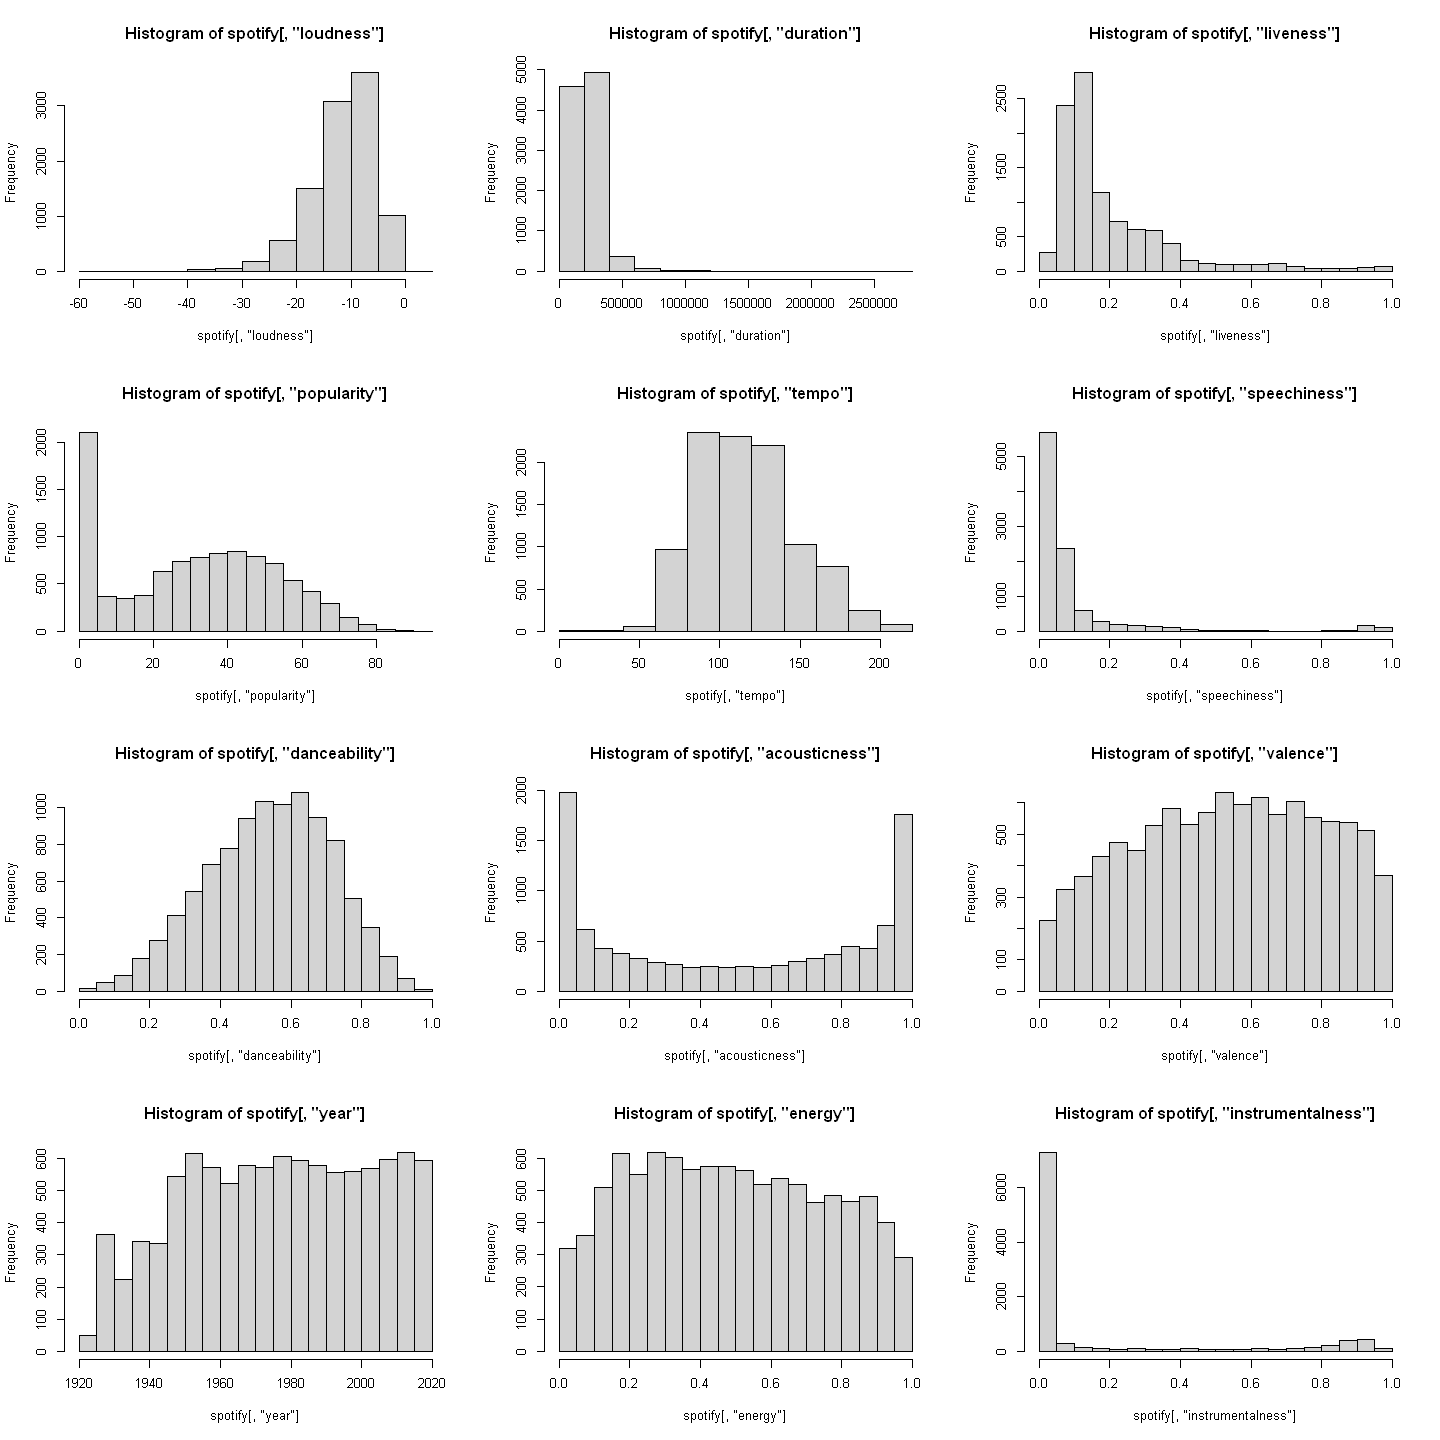

In [4]:
par(mfrow = c(4, 3))
options(repr.plot.width = 12, repr.plot.height = 12)
hist(spotify[, "loudness"])
hist(spotify[, "duration"])
hist(spotify[, "liveness"])
hist(spotify[, "popularity"])
hist(spotify[, "tempo"])
hist(spotify[, "speechiness"])
hist(spotify[, "danceability"])
hist(spotify[, "acousticness"])
hist(spotify[, "valence"])
hist(spotify[, "year"])
hist(spotify[, "energy"])
hist(spotify[, "instrumentalness"])



In [5]:
# 2 versions (avec sans transfo)

# spotify [, "liveness_n"] <- (log (1+spotify[, "liveness"]))
# hist(spotify[, "liveness_n"])

# spotify [, "speechiness_n"] <- (log (1+spotify[, "speechiness"]))
# hist(spotify[, "spechiness_n"])

# # summary(spotify)

Pour avoir le plus de symétrie possible (et donc se rapprocher de distributions plus gaussienes), on essaie quelques transformations sur certaines variables. Par exemple on prend le log de
liveness plutôt que liveness. On fait cela uniquement pour car on commence utiliser les modèles linéaires. 

corrplot 0.84 loaded



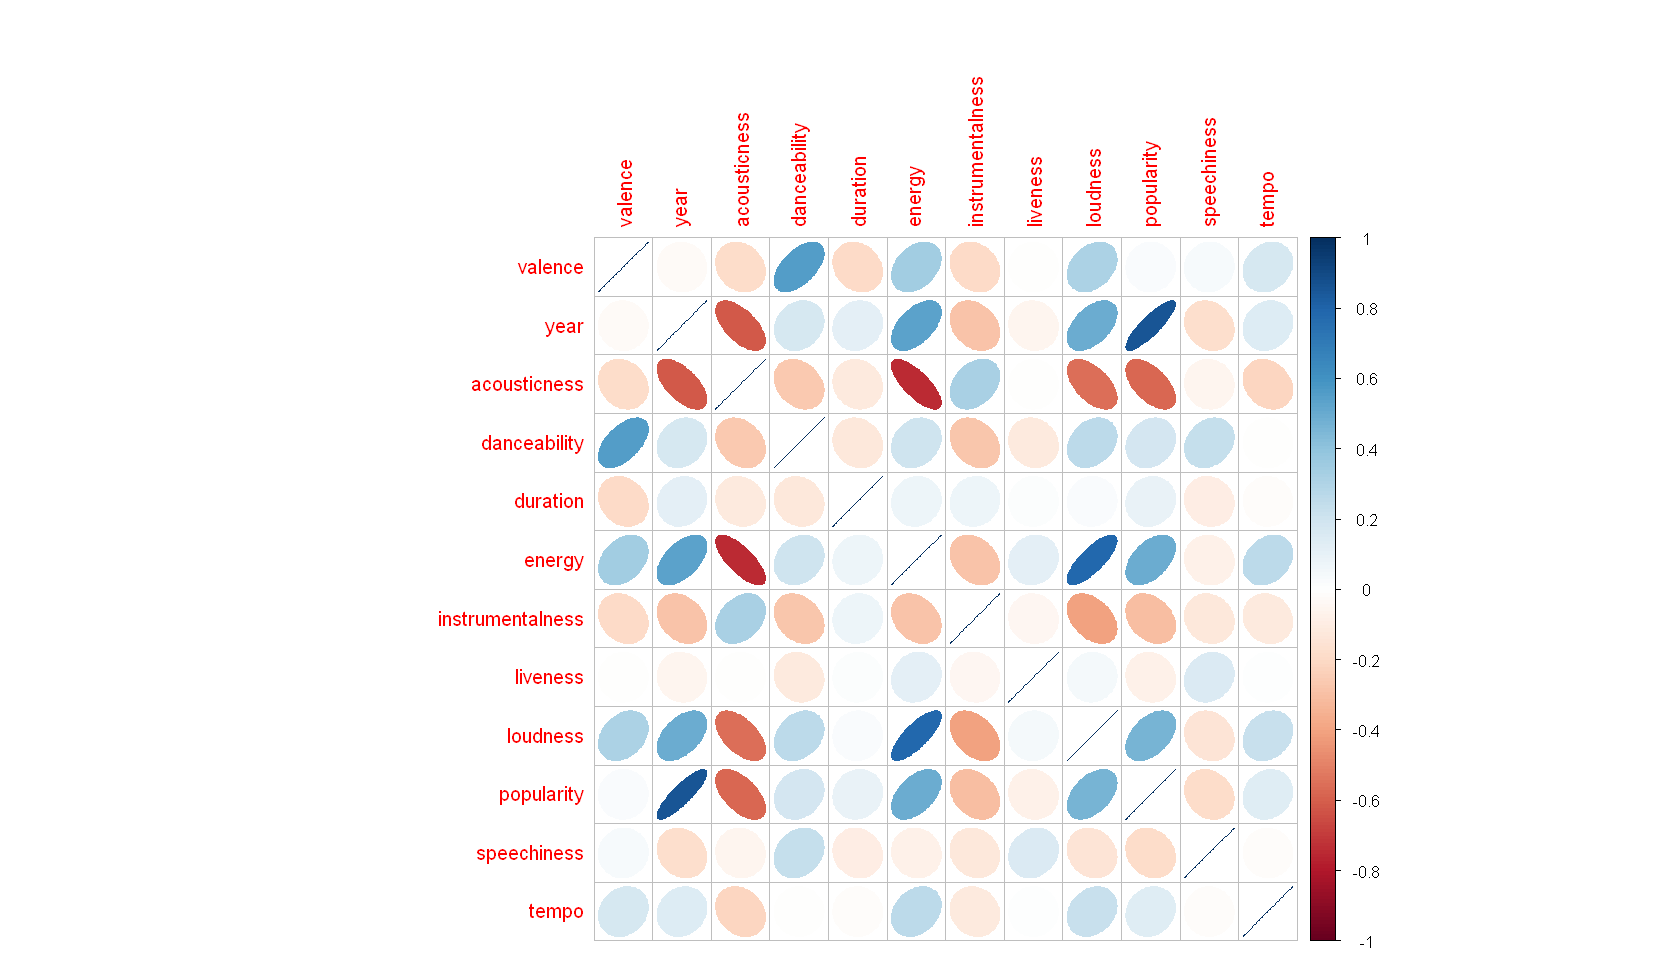

In [19]:
# options(repr.plot.width = 8, repr.plot.height = 8)
# pairs(spotify[, c(1:7, 9:10, 12:14)])

#le graphique par pairs de variables n'étant pas très ewxploitable on choisit de ne pas s'en servir.
library (corrplot)
corrplot(cor(spotify[, c(1:7, 9:10, 12:14)]), method="ellipse")

On affiche le graphe de corrélation entre nos variables quantitatives et on constate que la popularité est bien corrélée (positivement) avec l'année de même que l'énergie avec l'intensité (loudness).  A contrario on a une corrélation fortement négative entre l'énergie et (acousticness).

Notre variable réponse (pop.class) sera donc bien liée à l'année

### ACP 

In [7]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)
#spotify_acp= spotify [,-12] # C'est les données auxquelles on retire la variable popularité pour ne pas biaisée l'ACP.
acp.spotify <- PCA(spotify, scale.unit = TRUE,
            graph = FALSE, quali.sup = c(8,11,15) , quanti.sup = 12, ncp = 12)




Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



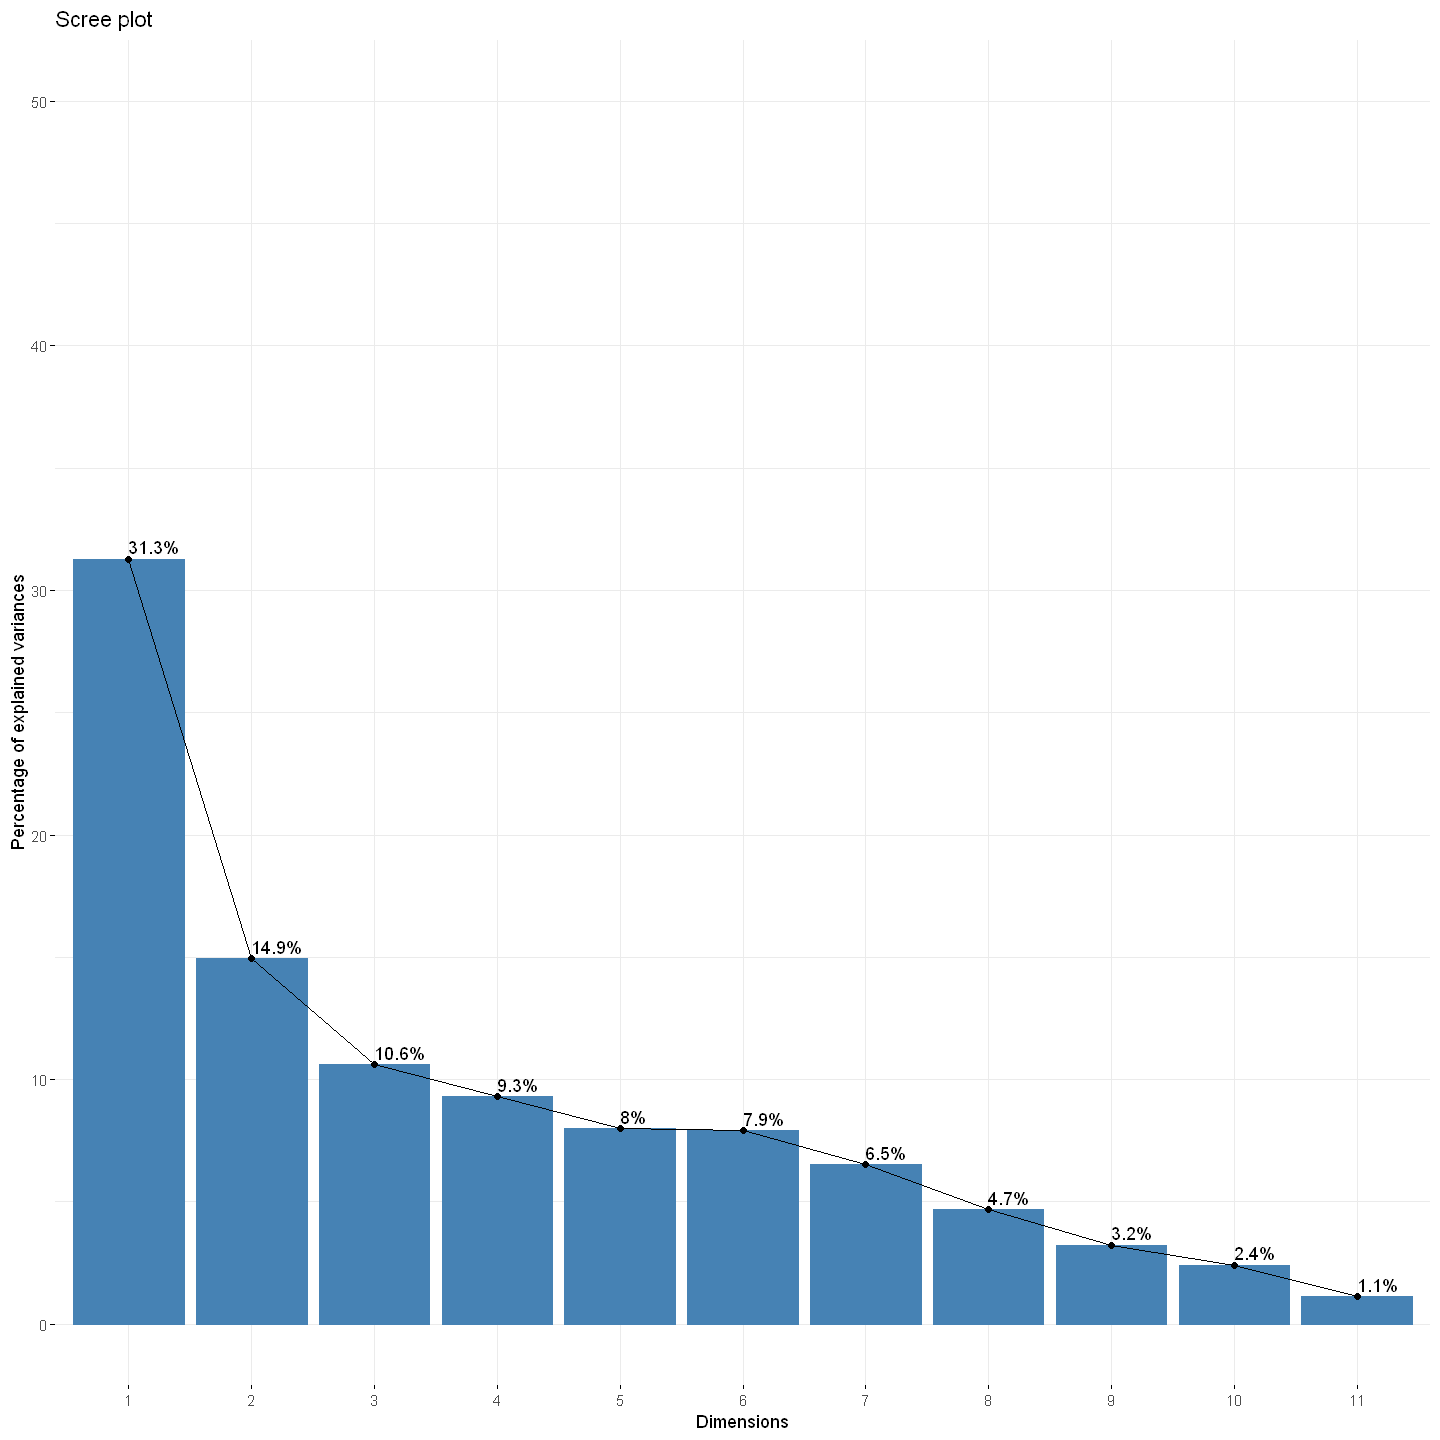

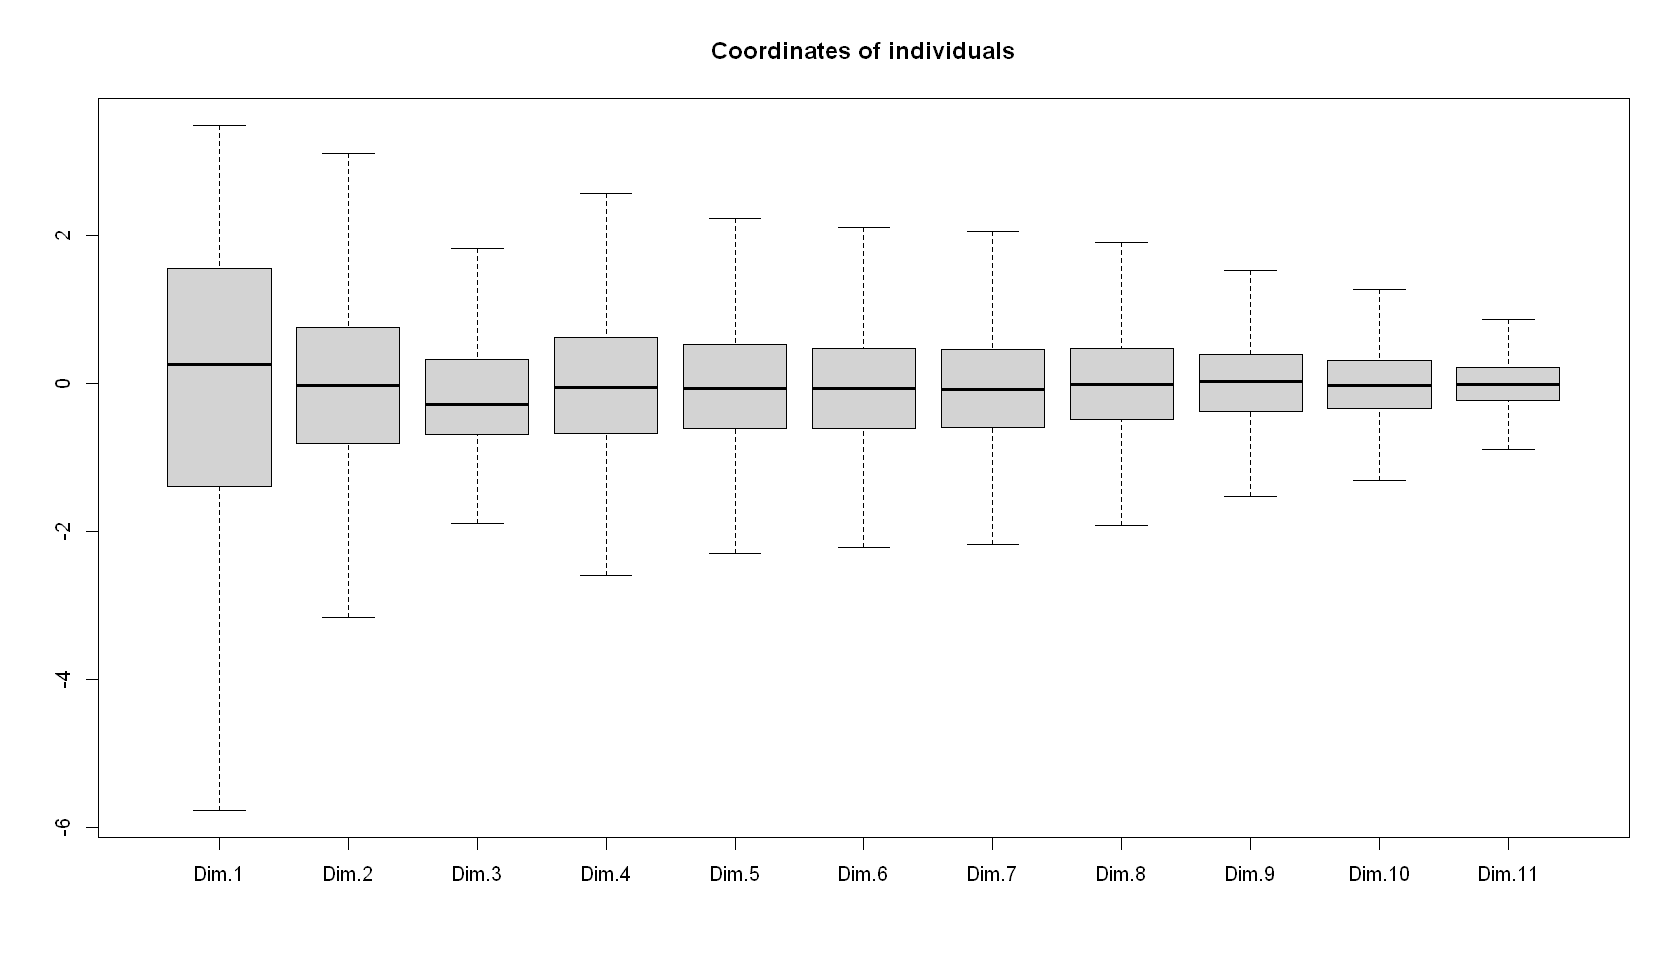

In [8]:
library(factoextra)

fviz_eig(acp.spotify,ncp=12,addlabels=TRUE, ylim=c(0,50))
options(repr.plot.width = 14, repr.plot.height = 8)

boxplot(acp.spotify$ind$coord, main = "Coordinates of individuals", outline=FALSE)

Avec l'éboulis de l'inertie on chosisit de garder 6 dimensions qui concentre plus de 80% de l'inertie totale, cela correspond bien à l'endroit ou il y'a une cassure sur le graphe
Sur le graphe des boxplots on confirme notre idée de conserver 6 dimensions car la variance devient très faible.   

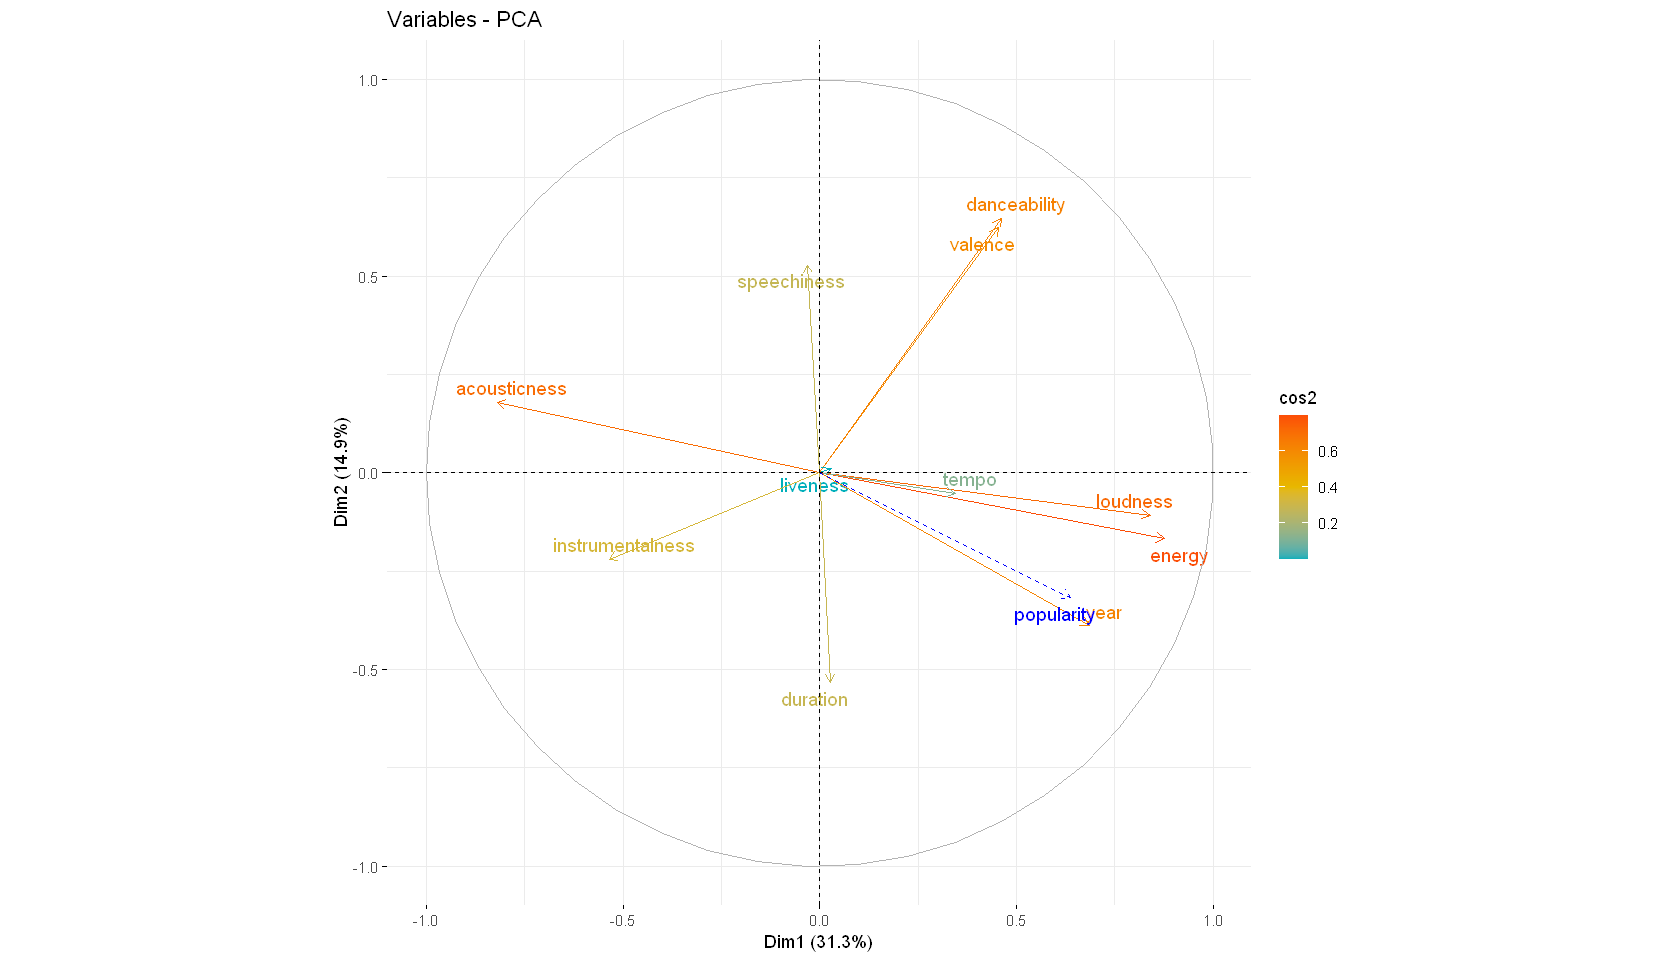

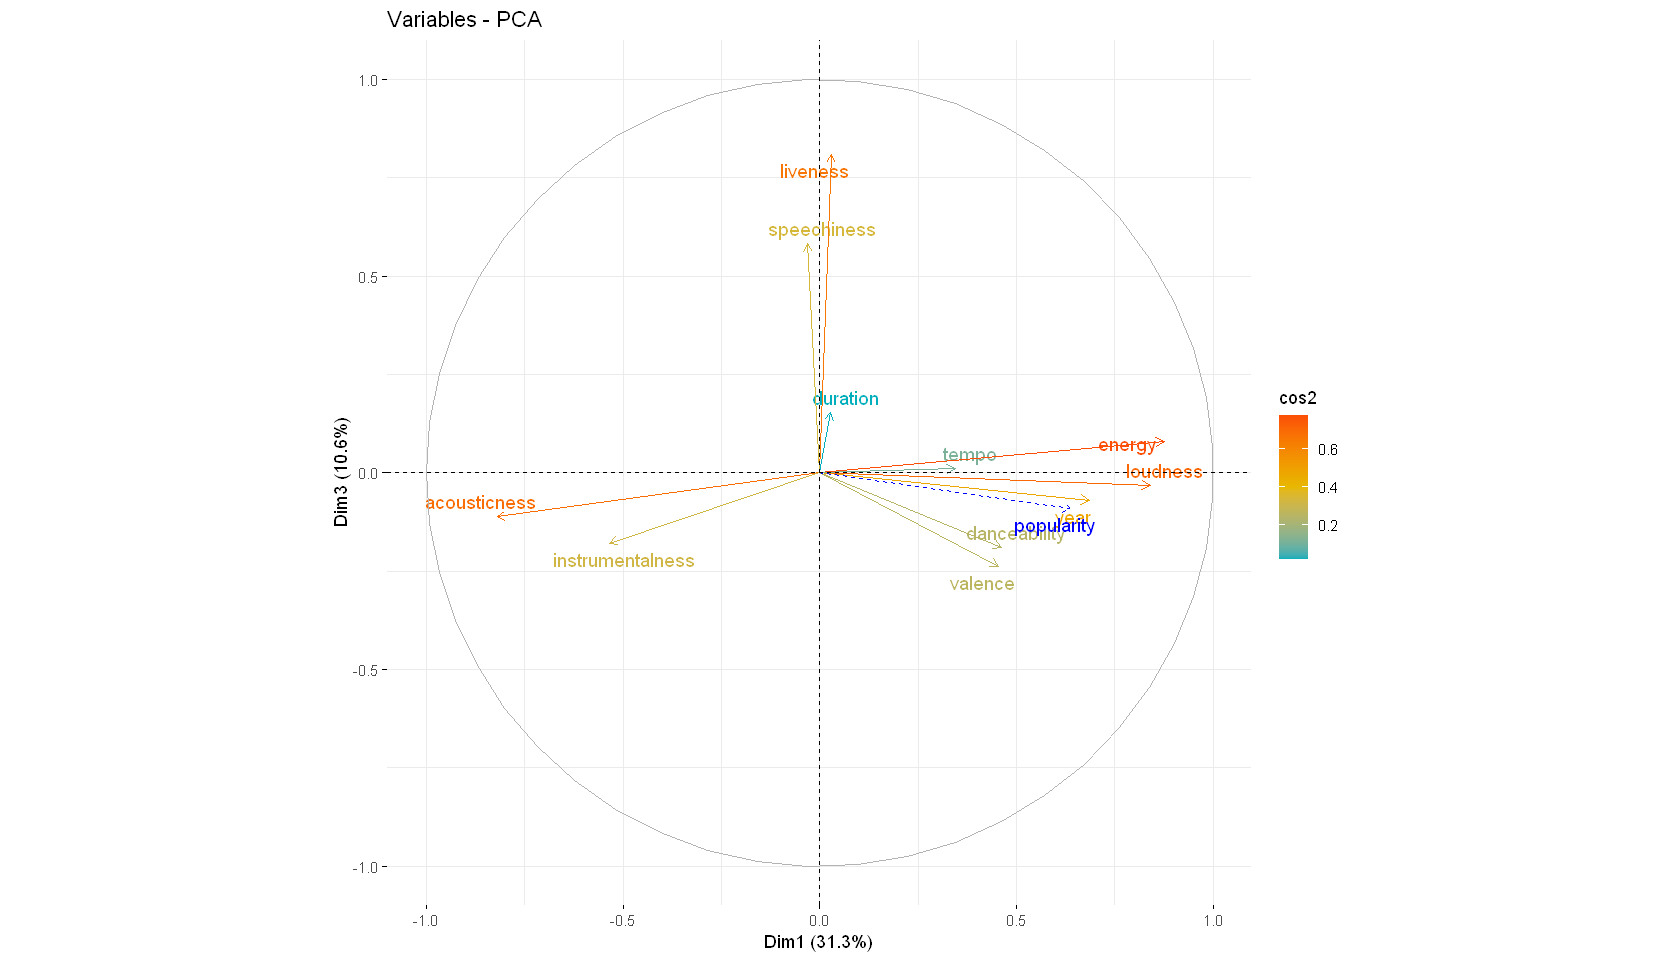

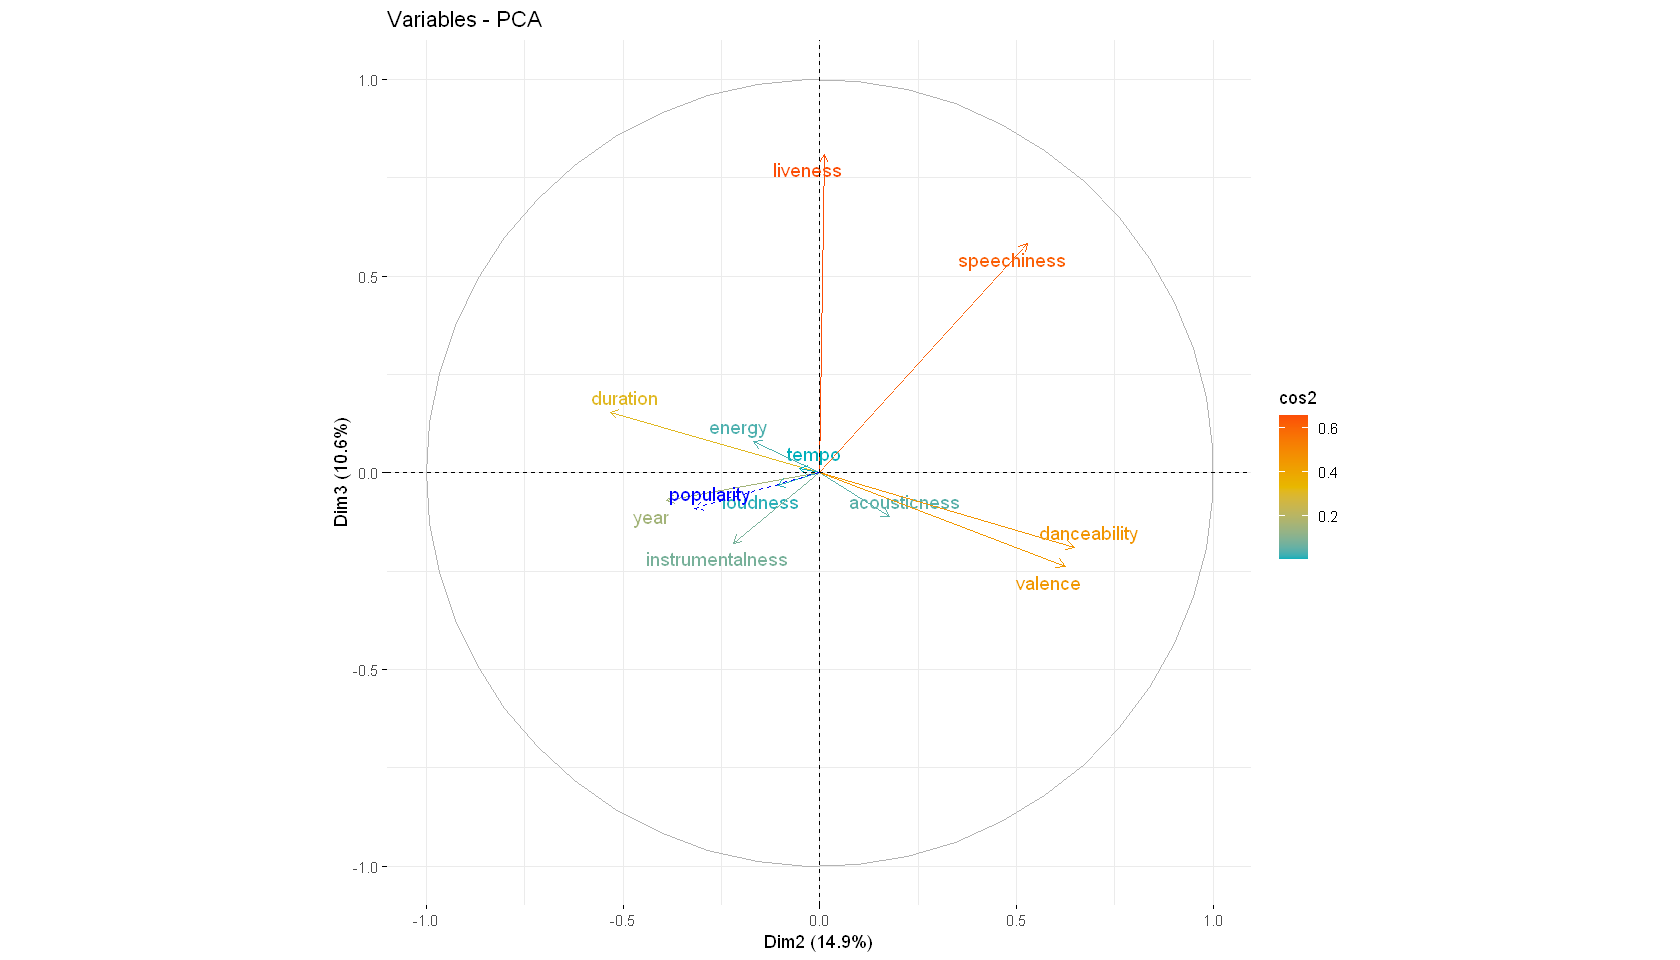

In [9]:
#plot(acp.spotify,axes=c(1, 2), choix = "ind", select = "contrib 5", unselect = 0)

fviz_pca_var(acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

fviz_pca_var(axes= c(1,3),acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

fviz_pca_var(axes= c(2,3),acp.spotify, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )
#acp.spotify

Warning message:
"ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


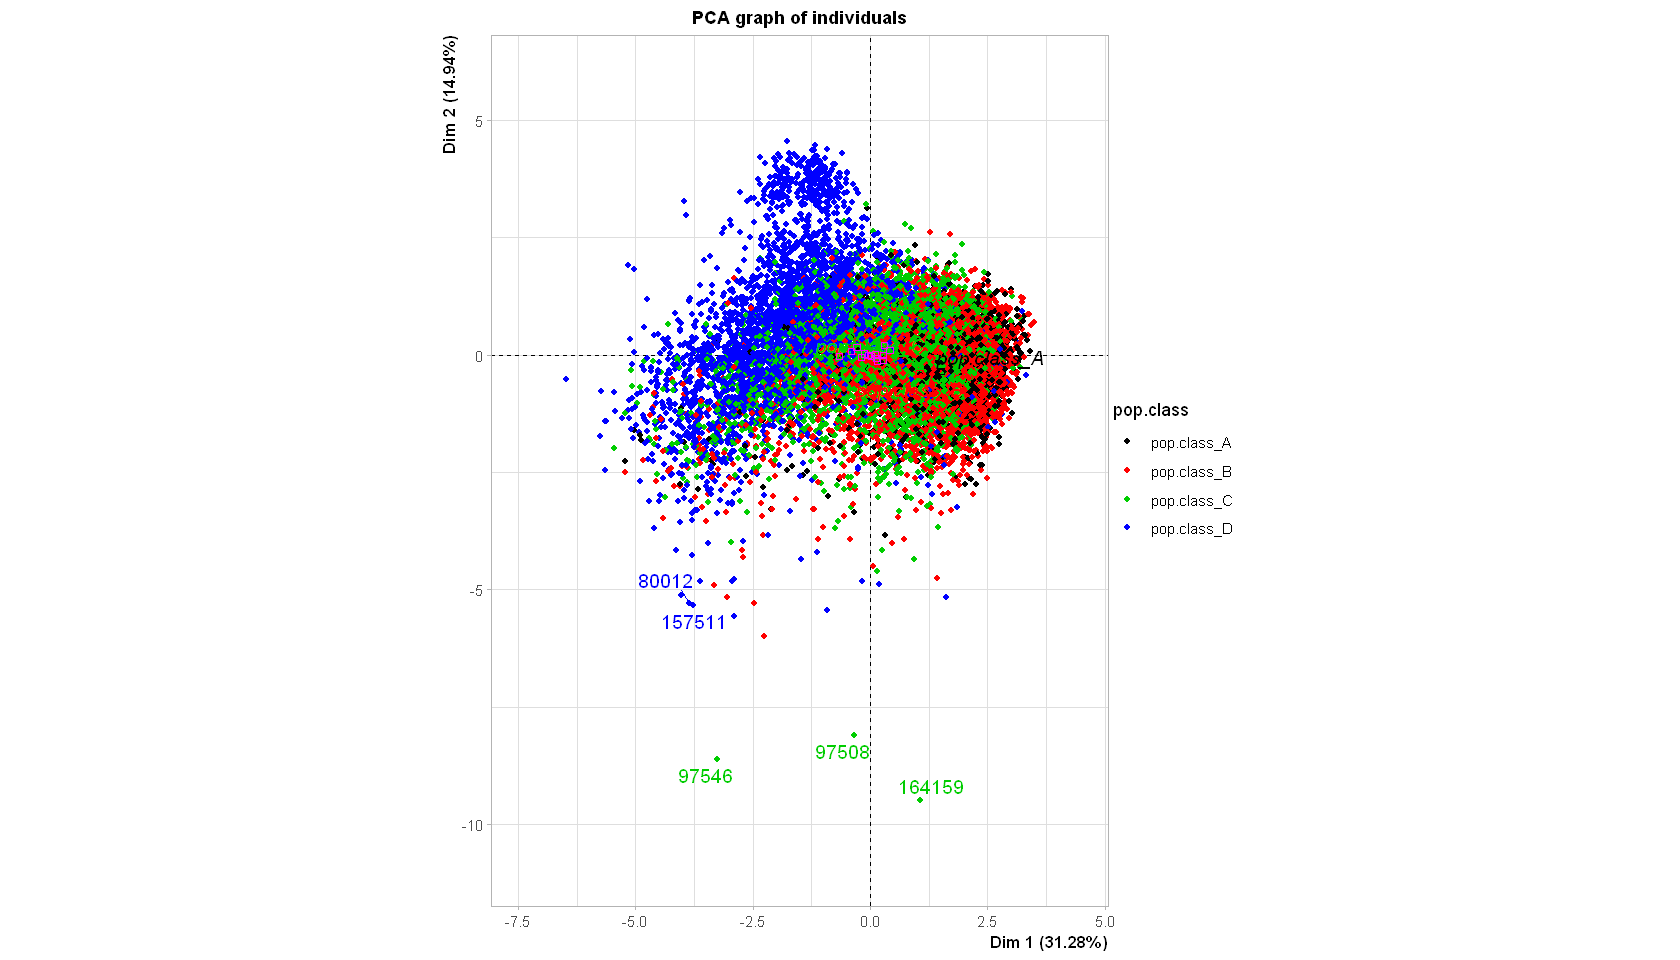

In [10]:
plot(acp.spotify, choix = "ind", habillage = 15,
     select = "contrib 5", unselect = 0)

On voit que les clusters ne sont pas assez distinguables, on a la classe D  (en bleu) qui est un peu distincte par rapport aux autres.

In [17]:
# summary(spotify)
# #summary(spotify [,c(-8,-11,-12,-15)])
# km.spotify <- kmeans (spotify [,c(-8,-11,-12,-15)], centers=4)
# cbind(coul= as.factor(km.spotify$cluster),spotify [,c(-8,-11,-12)])
# acp2 <- PCA (cbind(coul= as.factor(km.spotify$cluster),spotify [,c(-8,-11,-12)]),scale.unit=TRUE,
#             graph=FALSE, ncp=12) #quali.sup=c(8,11,15), quanti.sup=12)

# # plot(acp2, choix="ind", habillage="coul")

In [20]:
set.seed(4) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
n_li <- nrow(spotify) # nombre de lignes dans les données
n_col <- ncol(spotify) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(n_li * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:n_li, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:n_li, testi) 

### Construction des échantillons d'apprentissage et de test 

On doit diviser notre jeu de données en deux parties (app et test). L'étape test sera indispensable pour comparer les méthodes, tester leur efficacité etc.. Il est important de tester nos modèles sur des données qui n'ont pas servies pour l'apprentissage  pour éviter que l'erreur de généralisation soit biaisée.



#### Prédiction de la popularité 
On conserve popularity (var quantitative ) pour faire la Régression 

In [22]:
# construction de l'échantillon d'apprentissage
datappr <- spotify[appri, -15] 
# construction de l'échantillon test
datestr <- spotify[testi, -15] 
# vérification
#str(datappr)
#str(datestr)


#### Prédiction du niveau de popularité

On conserve pop class (var qualitative) pour faire de la classification

In [23]:
# construction de l'échantillon d'apprentissage
datappq <- spotify[appri, -12] 
# construction de l'échantillon test
datestq <- spotify[testi, -12] 
# vérification
#str(datappr)
#str(datestr)


In [24]:
# fonction pour tracer le graphe des résidus

options(repr.plot.width = 8, repr.plot.height = 4)
# Définition d'une fonction pour un graphe coloré et des échelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

### Classification Problem

#### Model 1- Régression losgistique (Sans interactions)

In [28]:
# estimation du modèle complet
pop.class=spotify[,"pop.class"]
log.lm <- glm( pop.class~. , data = datappq, family = binomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,7999,5112.879,NA
valence,1,1.244025e+01,7998,5100.439,4.201797e-04
year,1,1.561366e+03,7997,3539.072,0.000000e+00
acousticness,1,7.304378e+00,7996,3531.768,6.878679e-03
danceability,1,1.304112e+01,7995,3518.727,3.047251e-04
duration,1,1.016648e+01,7994,3508.560,1.430168e-03
energy,1,2.346324e-01,7993,3508.326,6.281100e-01
instrumentalness,1,2.032184e+01,7992,3488.004,6.544935e-06
key,11,1.500895e+01,7981,3472.995,1.820874e-01


In [30]:
log.lm.step <- step(log.lm, direction = "backward")

# Modèle obtenu
anova(log.lm.step, test = "Chisq")

Start:  AIC=3518.68
pop.class ~ valence + year + acousticness + danceability + duration + 
    energy + instrumentalness + key + liveness + loudness + mode + 
    speechiness + tempo

                   Df Deviance    AIC
- key              11   3485.8 3511.8
- tempo             1   3470.7 3516.7
- speechiness       1   3471.0 3517.0
- loudness          1   3471.1 3517.1
- mode              1   3471.2 3517.2
- liveness          1   3471.3 3517.3
- energy            1   3471.7 3517.7
<none>                  3470.7 3518.7
- acousticness      1   3475.3 3521.3
- valence           1   3475.9 3521.9
- danceability      1   3476.1 3522.1
- duration          1   3480.1 3526.1
- instrumentalness  1   3486.1 3532.1
- year              1   4228.0 4274.0

Step:  AIC=3511.83
pop.class ~ valence + year + acousticness + danceability + duration + 
    energy + instrumentalness + liveness + loudness + mode + 
    speechiness + tempo

                   Df Deviance    AIC
- tempo             1   3485.9

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,7999,5112.879,NA
valence,1,12.440249,7998,5100.439,4.201797e-04
year,1,1561.366498,7997,3539.072,0.000000e+00
acousticness,1,7.304378,7996,3531.768,6.878679e-03
danceability,1,13.041124,7995,3518.727,3.047251e-04
duration,1,10.166483,7994,3508.560,1.430168e-03
instrumentalness,1,19.833302,7993,3488.727,8.449764e-06


En faisant l'anova sur le modèle de régression logistique on a certaines variables qui ont une p valeur non négligeable (supérieur 10%) on peut les enlever pour simplifier le modèle. Au final on obtient le modèle optimal (qui minimise  l'AIC).


#### Model 1- Régression losgistique (Avec interactions)

#### Sélection de variables  Avec Pénalisation Lasso

In [ ]:
# Comparer avec un modèle quadratique avec pénalité L1
s.mat2 <- model.matrix(pop.class ~ .^2 - 1, data = datappq)
reg.lasso2.cv <- cv.glmnet(y = datappq[, "pop.class"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")